IBM HR ANALYTICS EMPLOYEE ATTRITION & PERFORMANCE

STEP 1 - IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

STEP 2 - LOAD DATASET

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

STEP 3 - PREVIEW DATASET

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


STEP 4 - DATA CLEANING & PREPROCESSING

In [ ]:
df.shape

(1470, 35)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
print("Missing Values:\n", df.isnull().sum())
print("Duplicated Rows:", df.duplicated().sum())

Missing Values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

In [ ]:
df.drop(columns=['EmployeeCount', 'Over18', 'StandardHours', 'EmployeeNumber'], inplace=True)

STEP 5 - EXPLORATORY DATA ANALYSIS (EDA)

Attrition Rate: 16.12%


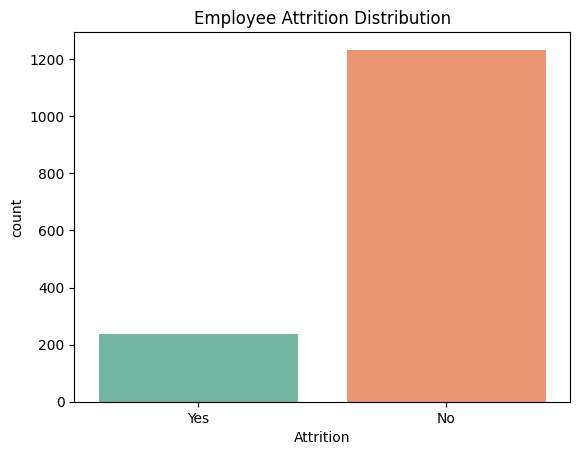

In [ ]:
attrition_rate = df['Attrition'].value_counts(normalize=True)['Yes'] * 100
print(f"Attrition Rate: {attrition_rate:.2f}%")

sns.countplot(data=df, x='Attrition', palette='Set2')
plt.title('Employee Attrition Distribution')
plt.show()

Average Tenure: 7.01 years


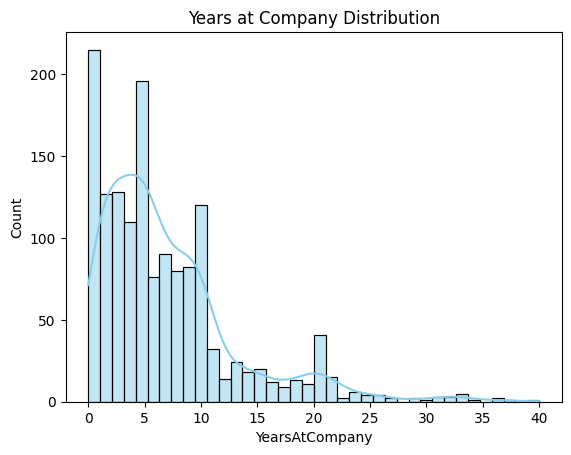

In [ ]:
avg_tenure = df['YearsAtCompany'].mean()
print(f"Average Tenure: {avg_tenure:.2f} years")

sns.histplot(df['YearsAtCompany'], kde=True, color='skyblue')
plt.title('Years at Company Distribution')
plt.show()

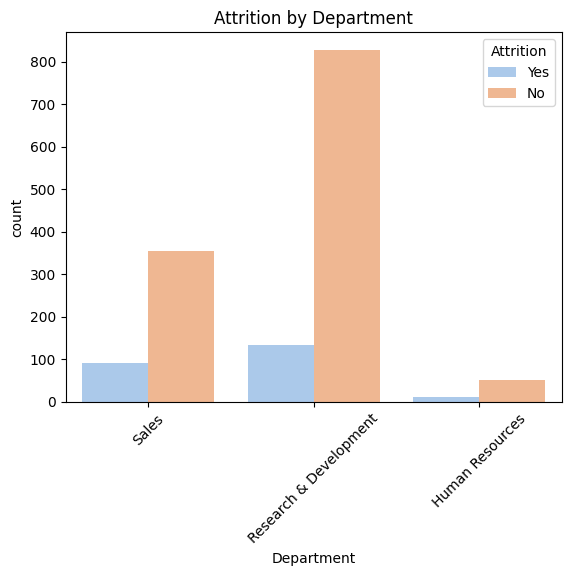

In [ ]:
sns.countplot(data=df, x='Department', hue='Attrition', palette='pastel')
plt.title('Attrition by Department')
plt.xticks(rotation=45)
plt.show()

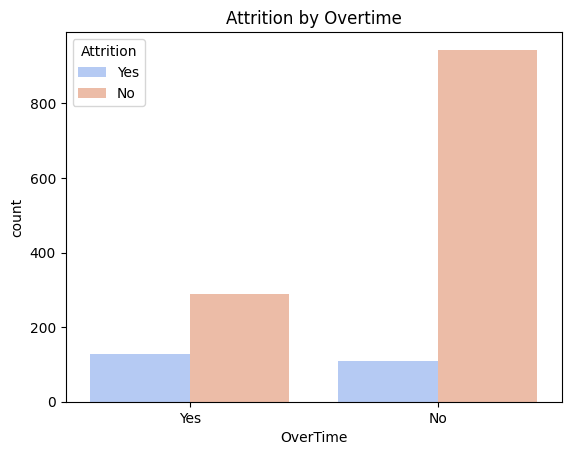

In [ ]:
sns.countplot(data=df, x='OverTime', hue='Attrition', palette='coolwarm')
plt.title('Attrition by Overtime')
plt.show()

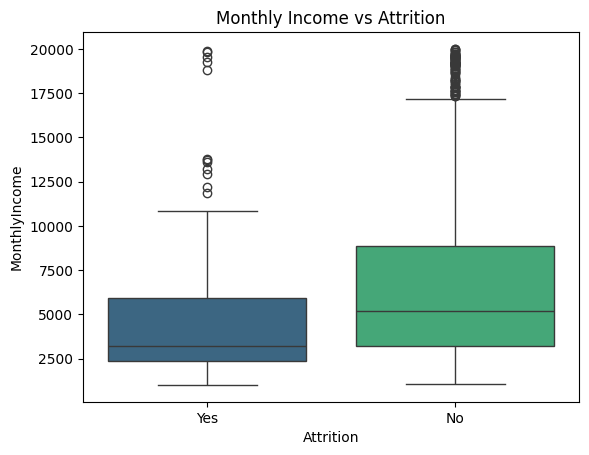

In [ ]:
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome', palette='viridis')
plt.title('Monthly Income vs Attrition')
plt.show()

STEP 6 - KEY INSIGHTS

In [ ]:
print("Key Insights:")
print("- Attrition Rate is around {:.2f}%.".format(attrition_rate))
print("- Average tenure is {:.2f} years.".format(avg_tenure))
print("- Employees working overtime tend to leave more often.")
print("- Most employees are from the Research & Development department.")
print("- Lower monthly income often correlates with higher attrition.")

Key Insights:
- Attrition Rate is around 16.12%.
- Average tenure is 7.01 years.
- Employees working overtime tend to leave more often.
- Most employees are from the Research & Development department.
- Lower monthly income often correlates with higher attrition.


STEP 7 - MACHINE LEARNING MODEL- PREDICTING ATTRITION

Encode Categorical Features

In [ ]:
df_model = df.copy()
label_cols = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
              'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
le = LabelEncoder()
for col in label_cols:
    df_model[col] = le.fit_transform(df_model[col])

Feature Selection

In [ ]:
X = df_model.drop('Attrition', axis=1)
y = df_model['Attrition']

Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train Random Forest Model

In [ ]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Model Evaluation

In [ ]:
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8616780045351474
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92       380
           1       0.50      0.10      0.16        61

    accuracy                           0.86       441
   macro avg       0.69      0.54      0.54       441
weighted avg       0.82      0.86      0.82       441



Feature Importance Plot

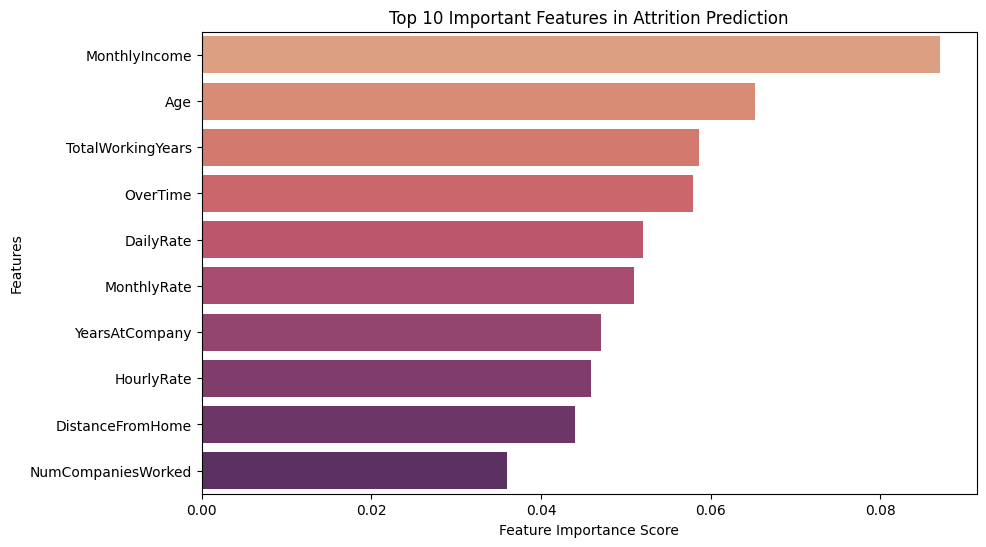

In [ ]:
feature_importance = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values[:10], y=feature_importance.index[:10], palette='flare')
plt.title("Top 10 Important Features in Attrition Prediction")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.show()

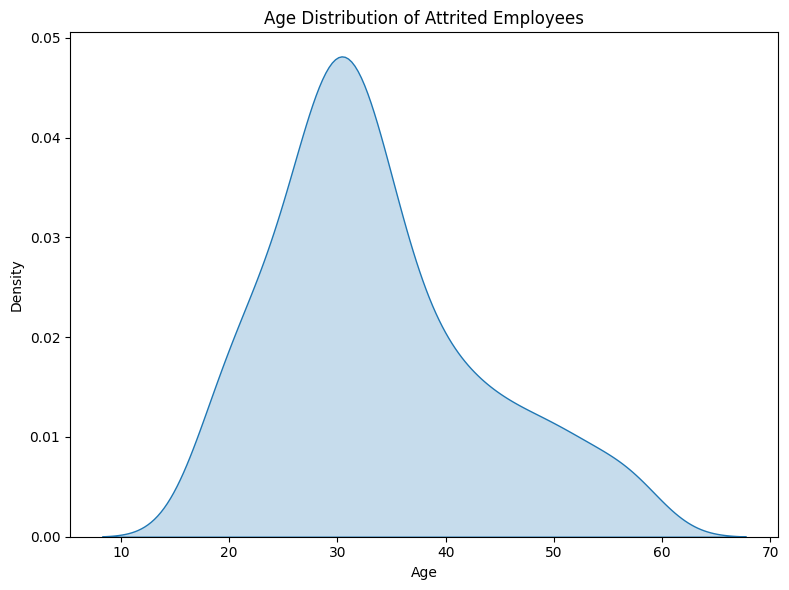

In [ ]:
fig, axes = plt.subplots(1, 1, figsize=(8, 6))
df_attrition = df[df['Attrition'] == 'Yes']
sns.kdeplot(data=df_attrition, x='Age', fill=True, ax=axes)
axes.set_title('Age Distribution of Attrited Employees')
axes.set_xlabel('Age')
axes.set_ylabel('Density')
plt.tight_layout()
plt.show()